In [51]:
import os

In [52]:
%pwd

'c:\\Users\\Navneet\\End-to-end-wine-quality\\End-to-end-wine-quality'

In [3]:
os.chdir("../")

In [53]:
%pwd

'c:\\Users\\Navneet\\End-to-end-wine-quality\\End-to-end-wine-quality'

In [56]:

pip install --no-cache-dir pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install --no-cache-dir pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [5]:
import os
print(os.getcwd())


c:\Users\Navneet\End-to-end-wine-quality\End-to-end-wine-quality\research


In [6]:
DATA_PATH = r"C:\Users\Navneet\End-to-end-wine-quality\End-to-end-wine-quality\data\winequality-red.csv"
wines = pd.read_csv(DATA_PATH)
print(wines.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [7]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

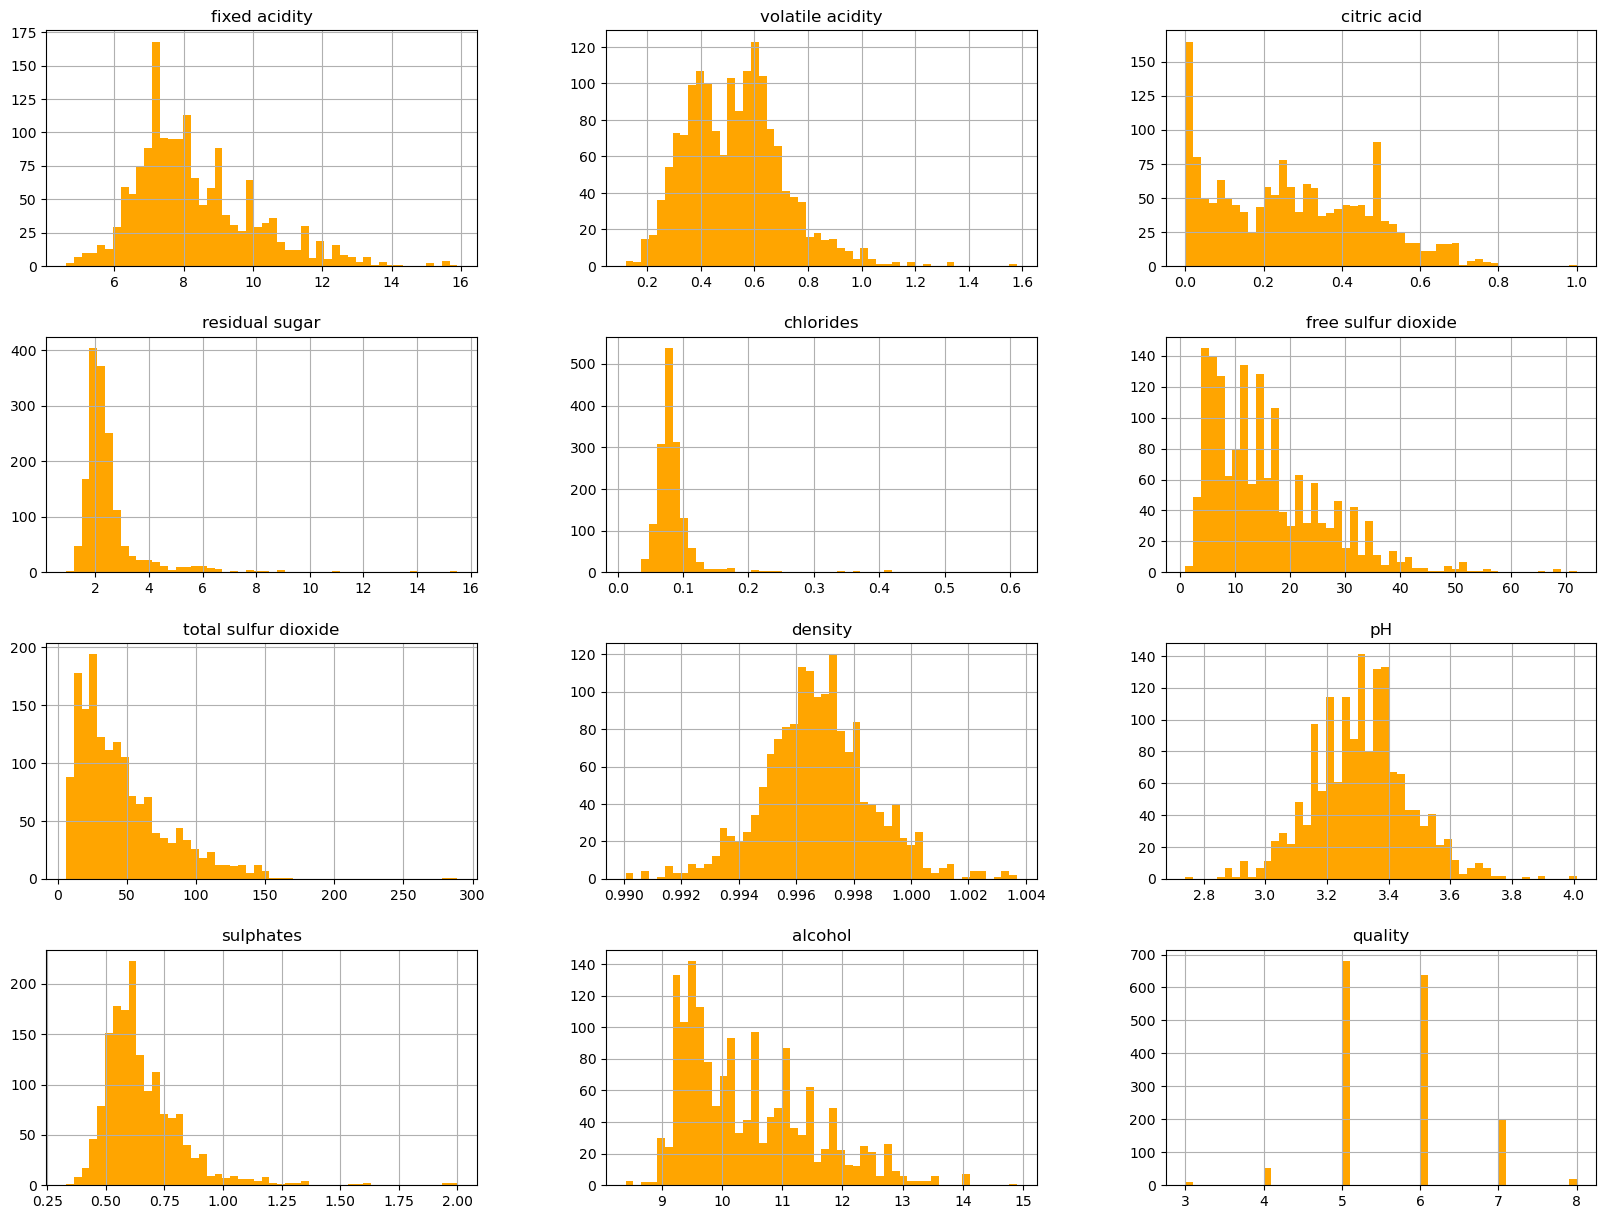

In [9]:
import matplotlib.pyplot as plt
wines.hist(bins=50, figsize=(20,15),color="orange")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
x = wines.drop(["quality"],axis=1)
y = wines["quality"]


In [13]:
x.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8


In [14]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [16]:
x_train, x_test, y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=42)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [18]:
from sklearn.linear_model import ElasticNet

In [23]:
lr = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
lr.fit(x_train,y_train)


ElasticNet(alpha=0.1, random_state=42)

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np

In [25]:
def eval_metrics(actual,pred):
    rmse =np.sqrt(mean_squred_error(actual,pred))
    mae =mean_absolute_error(actual,pred)
    r2= r2_score(actual,pred)
    return rmse,mae,r2


In [31]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2


In [33]:
predicted_qualities = lr.predict(x_test)
rmse, mae, r2 = eval_metrics(y_test, predicted_qualities)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")


RMSE: 0.6985911523308714
MAE: 0.5590548688059019
R2: 0.25321312561494613
